In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

C:\Users\Prashant Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [3]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [4]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),        # random left-right flip
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1),                 # zoom in/out
    layers.RandomTranslation(0.1, 0.1),     # shift image
])

In [5]:

inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)

x = layers.Conv2D(32, (3,3), activation="relu")(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(32, (3,3), activation="relu")(x)
x = layers.MaxPooling2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs)

In [12]:

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.6537 - loss: 0.9820 - val_accuracy: 0.6690 - val_loss: 0.9857
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6547 - loss: 0.9779 - val_accuracy: 0.6441 - val_loss: 1.0850
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6547 - loss: 0.9792 - val_accuracy: 0.6555 - val_loss: 1.0517
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6566 - loss: 0.9728 - val_accuracy: 0.6788 - val_loss: 0.9547
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6580 - loss: 0.9744 - val_accuracy: 0.6737 - val_loss: 0.9821
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6610 - loss: 0.9696 - val_accuracy: 0.6675 - val_loss: 1.0004
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6612 - loss: 0.9654 - val_accuracy: 0.6665 - val_loss: 0.9785
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6579 -

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np


img = image.load_img("billi.jpg", target_size=(32, 32)) 
img_array = image.img_to_array(img)
img_array = img_array / 255.0        
img_array = np.expand_dims(img_array, axis=0) #converted to dimension for cifar

In [14]:
pred = model.predict(img_array)
pred_class = np.argmax(pred)
print("Predicted class index:", pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted class index: 0


In [15]:
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

print("Prediction:", class_names[pred_class])

Prediction: airplane


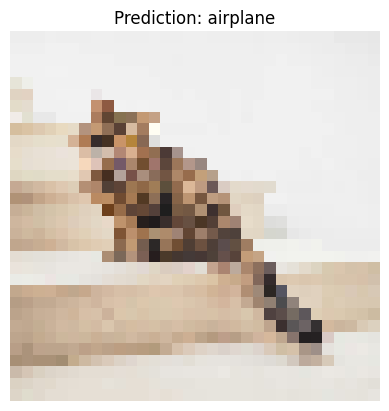

In [16]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title("Prediction: " + class_names[np.argmax(pred)])
plt.axis("off")
plt.show()